# import


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd

from PIL import Image  
import PIL 

import pickle

In [2]:
plt.rcParams['figure.figsize'] = [15, 15]

In [3]:
def rescaleData(data, mindata=0, maxdata=1):
	return np.interp(data, (data.min(), data.max()), (mindata, maxdata))

In [4]:
filepath = 'D:/0928/'
filename = '20200928a-intensity - speed test.avi'
avifile=filepath+filename

# get background

In [5]:
capture = cv2.VideoCapture(avifile)
backSub = cv2.createBackgroundSubtractorMOG2()

if not capture.isOpened:
    print('Unable to open: ' + file)
    exit(0)
    
totalN = int(capture.get(cv2.CAP_PROP_FRAME_COUNT))
imgW = capture.get(cv2.CAP_PROP_FRAME_WIDTH)
imgH = capture.get(cv2.CAP_PROP_FRAME_HEIGHT)
print('width=' , imgW)
print('height=', imgH)
print('length=',totalN)
cv2.namedWindow("Frame",0);
cv2.resizeWindow("Frame", 1000, 1000);
cv2.namedWindow("background",0);
cv2.resizeWindow("background", 1000, 1000);

# while True:
for j in range(1):
    capture = cv2.VideoCapture(avifile)
    for ID in range(60,1060):
        capture.set(cv2.CAP_PROP_POS_FRAMES, ID)
        ret, frame = capture.read()
        if frame is None:
            break
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        fgMask = backSub.apply(gray)
        bgimg = backSub.getBackgroundImage()

        
        cv2.rectangle(frame, (10, 2), (300,60), (255,255,255), -1)
        cv2.putText(frame, str(capture.get(cv2.CAP_PROP_POS_FRAMES)), (10, 40), cv2.FONT_HERSHEY_TRIPLEX, 2 , (0,0,0),3)
        cv2.imshow('Frame', frame)
        cv2.imshow('background', bgimg)
#         cv2.imshow('FG Mask', fgMask)


        keyboard = cv2.waitKey(30)
        if keyboard == 'q' or keyboard == 27:
            break
capture.release()  
cv2.destroyAllWindows() 

width= 4096.0
height= 2168.0
length= 4140


In [6]:
"""
capture.release()
cv2.destroyAllWindows()
"""

'\ncapture.release()\ncv2.destroyAllWindows()\n'

In [7]:
imgbg = bgimg.copy()

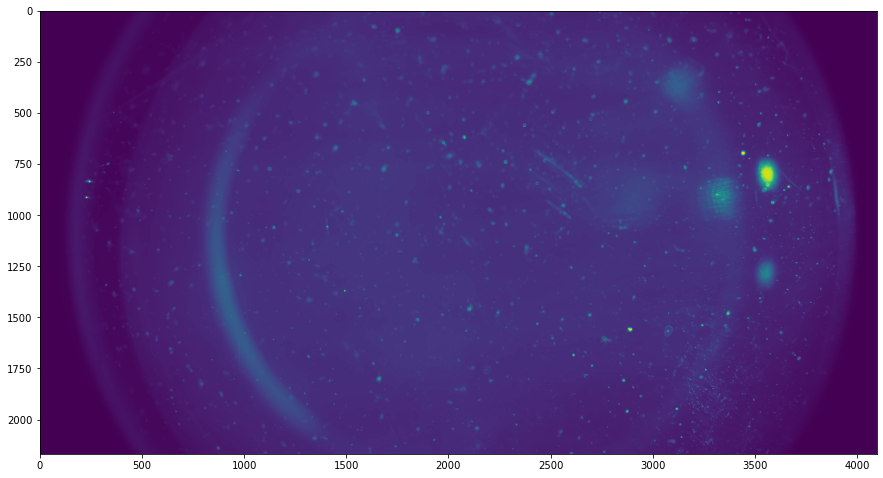

In [8]:
plt.imshow(imgbg)
plt.show()

In [9]:
im = Image.fromarray(imgbg)
im.save(avifile[:-4]+'_bg.png')
np.save(avifile[:-4]+'_bg.npy',imgbg)

In [10]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))

# detect volvox

In [11]:
"""imgbg = np.load('D:/0807/20200807a-noise(alternate grid)3_bg.npy')"""

"imgbg = np.load('D:/0807/20200807a-noise(alternate grid)3_bg.npy')"

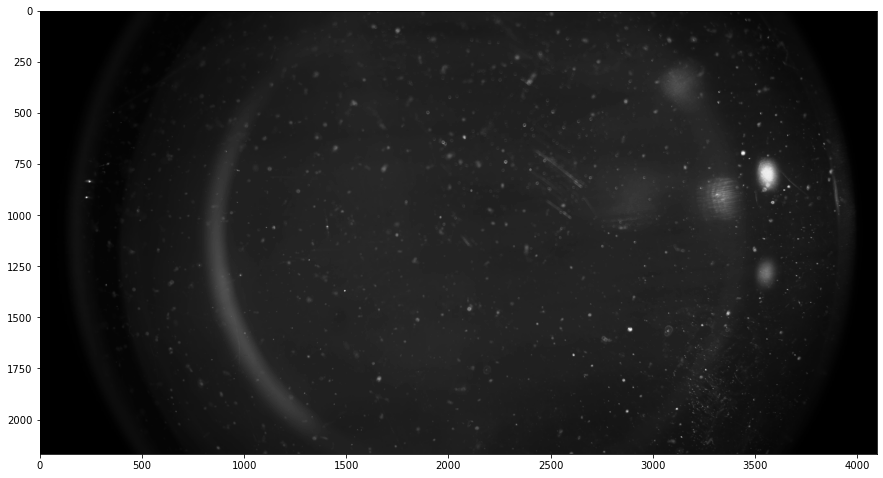

In [30]:
plt.imshow(imgbg,cmap="gray")
plt.show()

In [15]:
cap = cv2.VideoCapture(avifile)
cap.set(1,100)
ret, frame = cap.read()

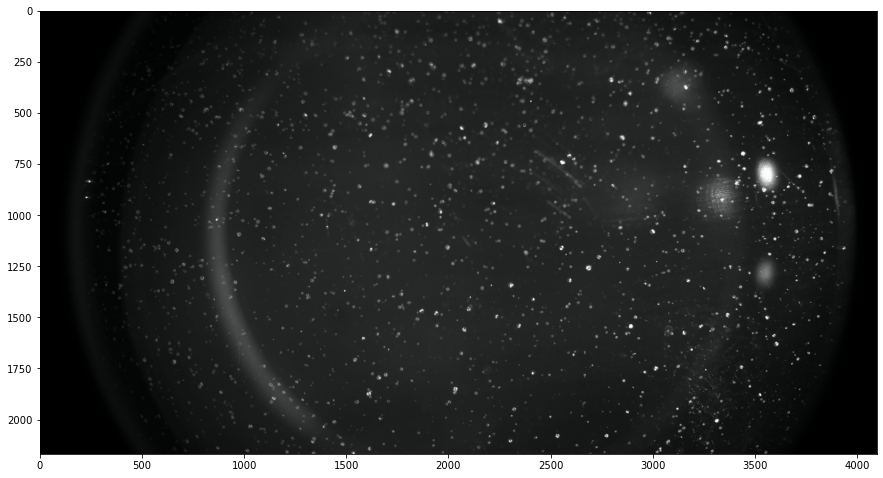

In [16]:
plt.imshow(frame)
plt.show()

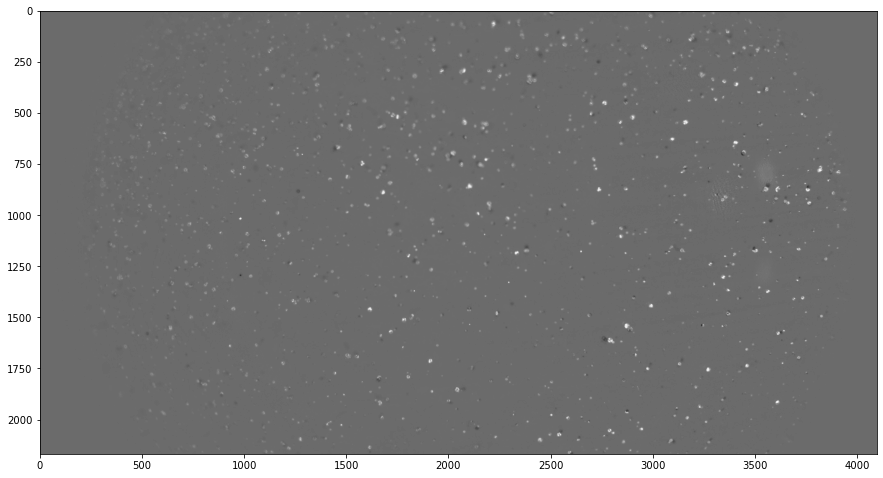

In [18]:
imgdiff=gray.astype(float)-imgbg.astype(float)
plt.imshow(imgdiff,cmap="gray")
plt.show()

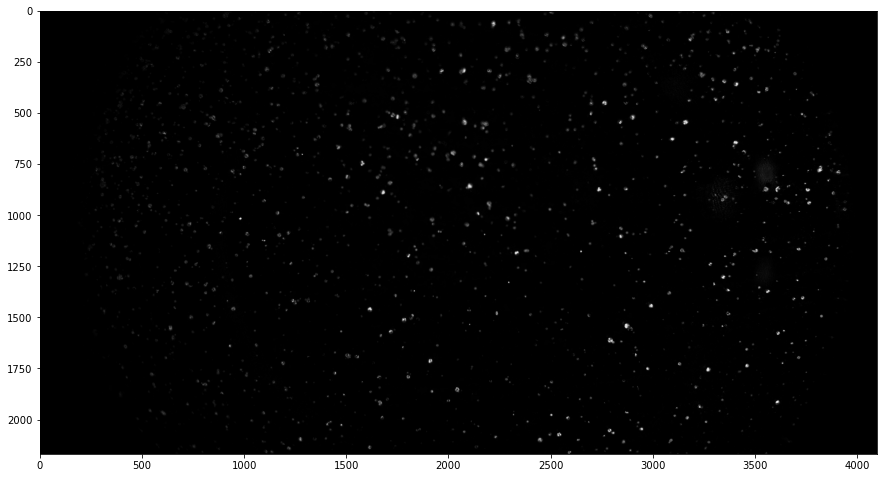

In [19]:
imgdiff[np.where(imgdiff<0)]=0
imgrescale = rescaleData(imgdiff, mindata=0, maxdata=255)
imgrescale = imgrescale.astype('uint8')
plt.imshow(imgrescale,cmap="gray")
plt.show()

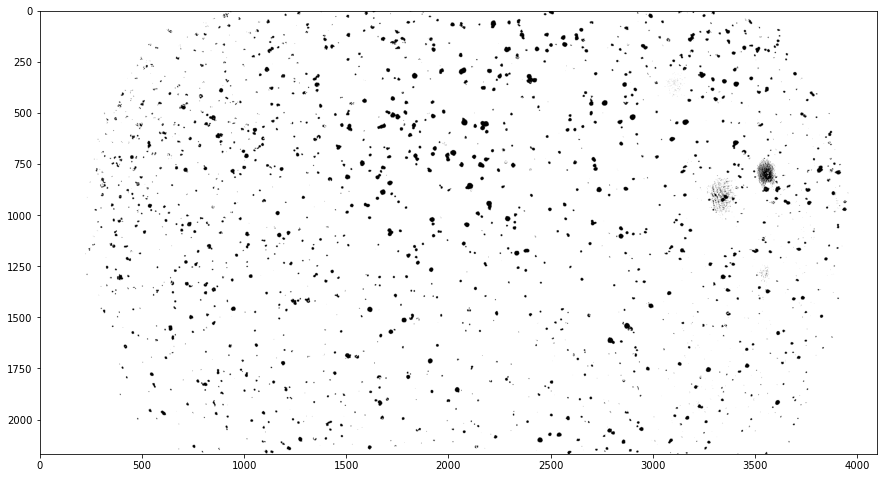

In [20]:
ret,thimg = cv2.threshold(imgrescale,15,255,cv2.THRESH_BINARY_INV)
plt.imshow(thimg,cmap="gray")
plt.show()

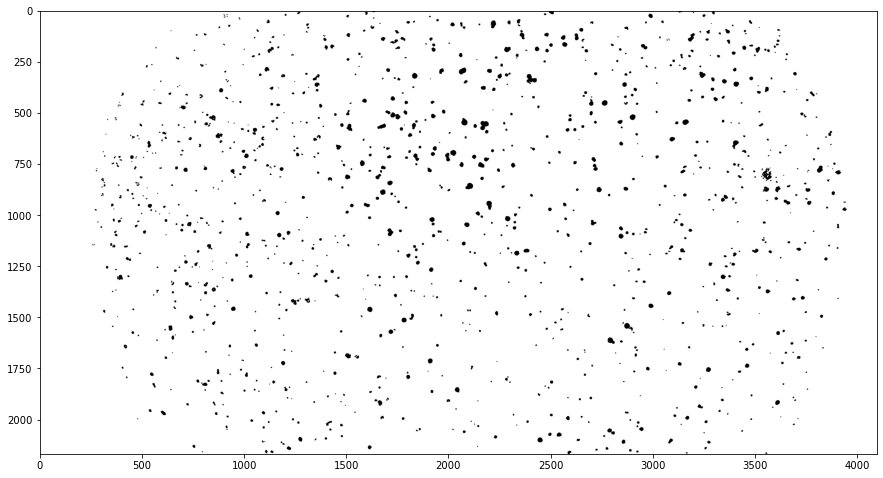

In [21]:
closingimg = cv2.morphologyEx(thimg,cv2.MORPH_CLOSE,kernel)
closingimg = cv2.morphologyEx(closingimg,cv2.MORPH_CLOSE,kernel)
plt.imshow(closingimg,cmap="gray")
plt.show()

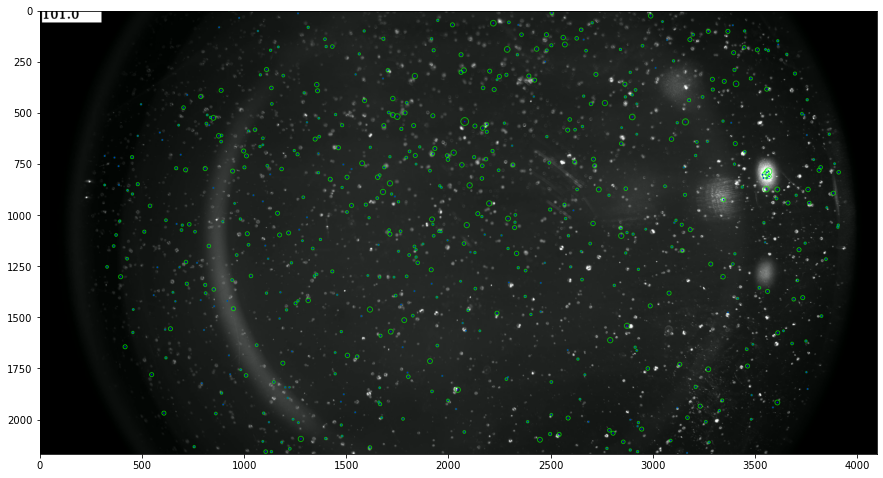

In [38]:
circles = cv2.HoughCircles(closingimg,cv2.HOUGH_GRADIENT,1,10,param1=50,param2=10,minRadius=2,maxRadius=20)
circles = np.around(circles).astype('int')
outputimg = frame.copy()

for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(outputimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(outputimg,(i[0],i[1]),2,(0,0,255),3)
    cv2.rectangle(outputimg, (10, 2), (300,60), (255,255,255), -1)
    cv2.putText(outputimg, str(cap.get(cv2.CAP_PROP_POS_FRAMES)), (10, 40), cv2.FONT_HERSHEY_TRIPLEX, 2 , (0,0,0),3)
plt.imshow(outputimg)
plt.show()

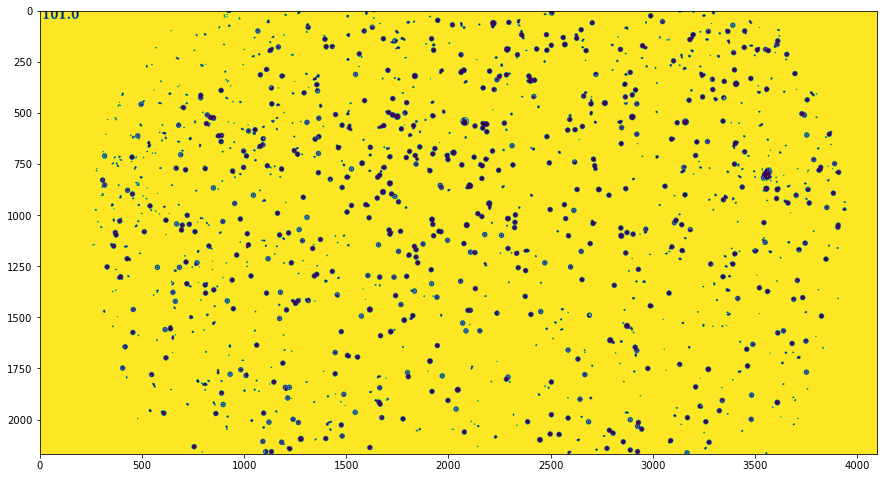

In [37]:
circles = cv2.HoughCircles(closingimg,cv2.HOUGH_GRADIENT,1,10,param1=50,param2=10,minRadius=3,maxRadius=20)
circles = np.around(circles).astype('int')
outputimg = closingimg.copy()

for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(outputimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(outputimg,(i[0],i[1]),10,(0,255,0),3)
    cv2.rectangle(outputimg, (10, 2), (300,60), (255,255,255), -1)
    cv2.putText(outputimg, str(cap.get(cv2.CAP_PROP_POS_FRAMES)), (10, 40), cv2.FONT_HERSHEY_TRIPLEX, 2 , (0,0,0),3)
plt.imshow(outputimg)
plt.show()

In [12]:
cv2.namedWindow("detected circles",0);
cv2.resizeWindow("detected circles", 1000, 1000);

cap = cv2.VideoCapture(avifile)
nframes = 403
data=np.array([[0,0,0,0]]) # x,y, radius,frameID
for frameID in range(nframes):
    try:
        cap.set(1,frameID) # (1, # of frame)
        ret, frame = cap.read()
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        imgdiff=gray.astype(float)-imgbg.astype(float)
        imgdiff[np.where(imgdiff<0)]=0
        imgrescale = rescaleData(imgdiff, mindata=0, maxdata=255)
        imgrescale = imgrescale.astype('uint8')
        ret,thimg = cv2.threshold(imgrescale,15,255,cv2.THRESH_BINARY_INV)
        closingimg = cv2.morphologyEx(thimg,cv2.MORPH_CLOSE,kernel)
        closingimg = cv2.morphologyEx(closingimg,cv2.MORPH_CLOSE,kernel)
        circles = cv2.HoughCircles(closingimg,cv2.HOUGH_GRADIENT,1,10,param1=50,param2=10,minRadius=3,maxRadius=20)
        circles = np.around(circles).astype('int')
        outputimg = frame.copy()

        for i in circles[0,:]:
            # draw the outer circle
            cv2.circle(outputimg,(i[0],i[1]),i[2],(0,255,0),2)
            # draw the center of the circle
            cv2.circle(outputimg,(i[0],i[1]),2,(0,0,255),3)
            cv2.rectangle(outputimg, (10, 2), (300,60), (255,255,255), -1)
            cv2.putText(outputimg, str(cap.get(cv2.CAP_PROP_POS_FRAMES)), (10, 40), cv2.FONT_HERSHEY_TRIPLEX, 2 , (0,0,0),3)
        cv2.imshow('detected circles',outputimg)
        cv2.waitKey(10)

        tempdata = np.append(circles[0],np.array([[frameID]*circles[0].shape[0]]).T,axis=1)
        data=np.append(data,tempdata,axis=0)
    except:
        print('fail in ',frameID)
data = np.delete(data,0,0)
dataset = pd.DataFrame({'x':data[:,0],'y':data[:,1],'radius':data[:,2],'frame':data[:,3]})

cap.release()
cv2.destroyAllWindows()

In [13]:
dataset.to_pickle(avifile[:-4]+'_data')
avifile[:-4]+'_data'

'D:/0928/20200928a-intensity - speed test_data'

In [14]:
"""
capture.release()
cv2.destroyAllWindows()
"""

'\ncapture.release()\ncv2.destroyAllWindows()\n'

In [27]:
capture.release()
cv2.destroyAllWindows()